In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving realdata.csv to realdata.csv


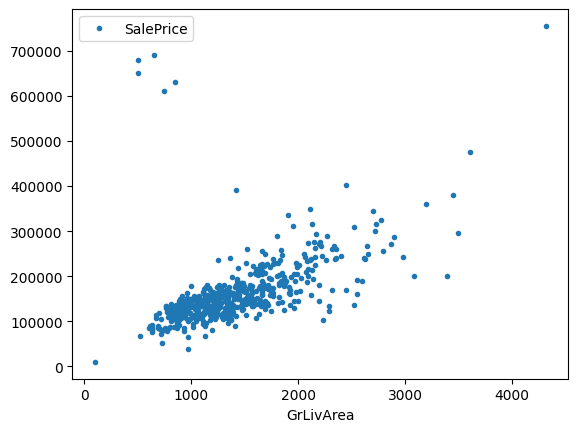

In [ ]:
data = pd.read_csv('realdata.csv')
data.plot(x='GrLivArea', y='SalePrice',style='.')
plt.show()

In [ ]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
# print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

print('m from formula: %f' % m_calc)
print("b from formula: %f" % b_calc)

m from formula: 74.393764
b from formula: 58301.507476


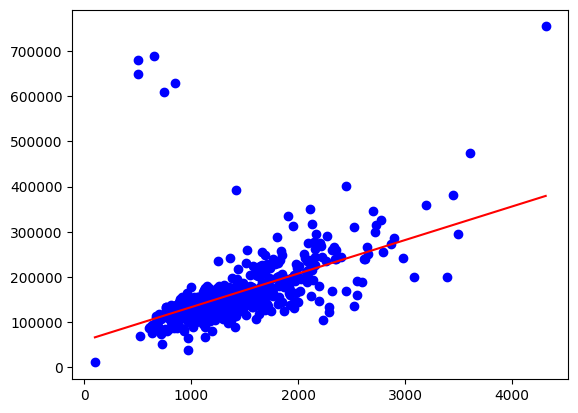

In [ ]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')
   plt.show()

plot_data(x,y,m,b)

In [ ]:
def model(x,m,b):
   return m * x + b

In [ ]:
def loss(x,y,m,b):

 predicted_y = model(x, m, b)
 squared_error = (y - predicted_y) ** 2
 mean_squared_error = np.mean(squared_error)
 return mean_squared_error

In [ ]:
 def updated_m(x,y,m,b,learning_rate_b):

  predicted_y = model(x, m, b)
  gradient = -2*x * (y - predicted_y)
  upd_m = m - learning_rate_m * np.mean(gradient)
  return upd_m

In [ ]:
def updated_b(x,y,m,b,learning_rate_b):

  predicted_y = model(x, m, b)
  gradient = -2 * (y - predicted_y)
  upd_b = b - learning_rate_b * np.mean(gradient)
  return upd_b

In [ ]:
# set our initial slope and intercept
m = 5.
b = 1000.
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time

In [ ]:
from collections import defaultdict
loss_history = defaultdict(list)

loop_N = 10000
loss_value=0
for i in range(loop_N):
    # update our slope and intercept based on the current values
    m = updated_m(x,y,m,b,learning_rate_m)
    b = updated_b(x,y,m,b,learning_rate_b)

    # calculate the loss value
    loss_value = np.mean(loss(x,y,m,b))
    # keep a history of our loss values for each epoch
    loss_history['0'].append(loss_value)

print('m from gradient descent: %f' % np.mean(m))
print("b from gradient descent: %f" % np.mean(b))

m from gradient descent: 74.393764
b from gradient descent: 58301.507476


In [1]:
plt.plot(loss_history['0'])
plt.xlim(0,5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss values')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined